# Exploración de datos

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
precios_gas        = pd.read_csv('datasets/precios-gas-natural.csv')
precios_materiales = pd.read_csv('datasets/precios-materiales-construccion.csv')

In [54]:
precios_materiales.rename(
    columns={
        'Año': 'anio',
        'Mes': 'mes',
        'id_Rubro': 'id_rubro',
        'Rubro': 'rubro',
        'variación mensual': 'variacion_mensual'
    },
    inplace=True
)   

In [14]:
precios_materiales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   anio               884 non-null    int64  
 1   mes                884 non-null    int64  
 2   id_rubro           884 non-null    int64  
 3   rubro              884 non-null    object 
 4   indice             884 non-null    float64
 5   variacion_mensual  884 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.6+ KB


In [15]:
precios_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_pub                936 non-null    int64  
 1   anio                  936 non-null    int64  
 2   mes                   936 non-null    int64  
 3   cuenca                936 non-null    object 
 4   contrato              936 non-null    object 
 5   precio_distribuidora  936 non-null    float64
 6   precio_gnc            936 non-null    float64
 7   precio_usina          936 non-null    float64
 8   precio_industria      936 non-null    float64
 9   precio_otros          936 non-null    float64
 10  precio_ppp            936 non-null    float64
 11  precio_expo           936 non-null    float64
 12  indice_tiempo         936 non-null    object 
dtypes: float64(7), int64(3), object(3)
memory usage: 95.2+ KB


In [63]:
precios_materiales.anio = precios_materiales.anio.astype(str)
precios_materiales.mes = precios_materiales.mes.astype(str)

In [73]:
fechas = precios_materiales.anio + '-' + precios_materiales.mes.str.zfill(2)

In [74]:
precios_materiales['indice_tiempo'] = fechas

In [75]:
precios_materiales.head()

,anio,mes,id_rubro,rubro,indice,variacion_mensual,indice_tiempo
0,2019,1,1,Asfalto,100.000000,0.000000,2019-01
1,2019,1,2,Cales,100.995049,0.995049,2019-01
2,2019,1,4,Cemento portland,102.000000,2.000000,2019-01
3,2019,1,8,Hierro redondo y acero para construcción,100.000000,0.000000,2019-01
4,2019,1,9,Hormigón elaborado,102.000000,2.000000,2019-01


In [76]:
precios_gas.head()

,id_pub,anio,mes,cuenca,contrato,precio_distribuidora,precio_gnc,precio_usina,precio_industria,precio_otros,precio_ppp,precio_expo,indice_tiempo
0,1,2019,1,Austral Santa Cruz,FIRME,3.56,3.43,3.10,3.27,3.75,3.30,2.00,2019-01
1,2,2019,1,Austral Santa Cruz,INTERRUMPIBLE,3.04,3.54,2.29,2.38,0.00,2.39,3.25,2019-01
2,3,2019,1,Austral Santa Cruz,TOTAL,3.40,3.44,2.65,3.13,3.75,3.03,3.08,2019-01
3,4,2019,1,Austral Tierra del Fuego,FIRME,3.66,3.33,3.30,3.39,0.00,3.45,0.00,2019-01
4,5,2019,1,Austral Tierra del Fuego,INTERRUMPIBLE,3.43,0.00,2.33,2.28,0.00,2.37,3.49,2019-01


In [79]:
precios = \
    pd.merge(
        left=precios_gas,
        right=precios_materiales,
        how='inner',
        left_on='indice_tiempo',
        right_on='indice_tiempo'
    )

In [83]:
precios.drop(
    columns={
        'anio_x',
        'mes_x',
        'anio_y',
        'mes_y'
    },
    inplace=True
)

In [88]:
precios.cuenca.value_counts()

Austral Santa Cruz          2652
Austral Tierra del Fuego    2652
Golfo de San Jorge          2652
Neuquina                    2652
Noroeste                    2652
Total Cuenca                2652
Name: cuenca, dtype: int64

Separamos por cuenca para el análisis

In [99]:
santa_cruz = precios[precios.cuenca == 'Austral Santa Cruz']
tierra_del_fuego = precios[precios.cuenca == 'Austral Tierra del Fuego']
golfo_san_jorge = precios[precios.cuenca == 'Golfo de San Jorge']
neuquina = precios[precios.cuenca == 'Neuquina']
noroeste = precios[precios.cuenca == 'Noroeste']

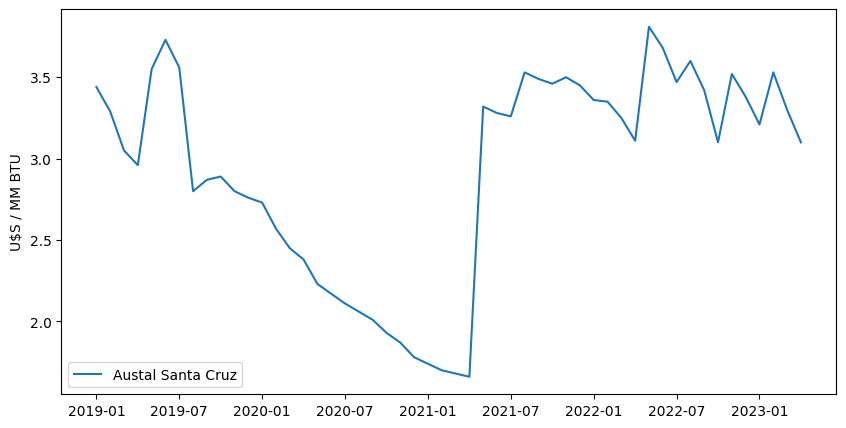

In [129]:
plt.figure(figsize = (10, 5))
plt.plot(
    precios_gas[(precios_gas.cuenca == 'Austral Santa Cruz') & (precios_gas.contrato == 'TOTAL')].indice_tiempo,
    precios_gas[(precios_gas.cuenca == 'Austral Santa Cruz') & ((precios_gas.contrato == 'TOTAL'))].precio_gnc,
    label='Austal Santa Cruz'
)

plt.xticks(np.arange(0, 51, 6))
plt.ylabel('U$S / MM BTU')

plt.legend()

In [117]:
precios_gas[(precios_gas.cuenca == 'Austral Santa Cruz') & ((precios_gas.contrato == 'TOTAL'))].shape

(52, 13)

In [102]:
santa_cruz.indice_tiempo

0        2019-01
1        2019-01
2        2019-01
3        2019-01
4        2019-01
          ...   
15652    2023-04
15653    2023-04
15654    2023-04
15655    2023-04
15656    2023-04
Name: indice_tiempo, Length: 2652, dtype: object